In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
cars_df = pd.read_csv("/content/Automobile.csv")

In [5]:
cars_df.sample(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
390,toyota celica gt,32.0,4,144.0,96.0,2665,13.9,82,japan
35,chevrolet chevelle malibu,17.0,6,250.0,100.0,3329,15.5,71,usa
370,pontiac j2000 se hatchback,31.0,4,112.0,85.0,2575,16.2,82,usa
83,dodge colt (sw),28.0,4,98.0,80.0,2164,15.0,72,usa
276,saab 99gle,21.6,4,121.0,115.0,2795,15.7,78,europe


In [6]:
nRow, nCol = cars_df.shape
print(f'Number of rows is {nRow}')
print(f'Number of columns is {nCol}')

Number of rows is 398
Number of columns is 9


In [7]:
cars_df.columns.tolist()

['name',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

### datatype

In [8]:
cars_df.dtypes

,0
name,object
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object


### duplicate

In [9]:
print(f"The total duplicated values are '{cars_df.duplicated().sum()}'.")

The total duplicated values are '0'.


In [10]:
duplicate_rows_df = cars_df[cars_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


### missing values

In [11]:
null = pd.DataFrame({'Null Values' : cars_df.isna().sum(), 'Percentage Null Values' : (cars_df.isna().sum()) / (cars_df.shape[0]) *100})
null

,Null Values,Percentage Null Values
name,0,0.000000
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,1.507538
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000


In [12]:
null[null['Null Values'] > 0]

,Null Values,Percentage Null Values
horsepower,6,1.507538


it seem horsepower column contains 6 missing value, let's drop it...

In [13]:
cars_df = cars_df.dropna()

In [14]:
cars_df.isna().sum().sum()

0

In [15]:
print(f'Number of row after drop missing values is {cars_df.shape[0]}')

Number of row after drop missing values is 392


### description

In [16]:
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### corrations

In [17]:
df_corr = cars_df.corr(numeric_only=True)
df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


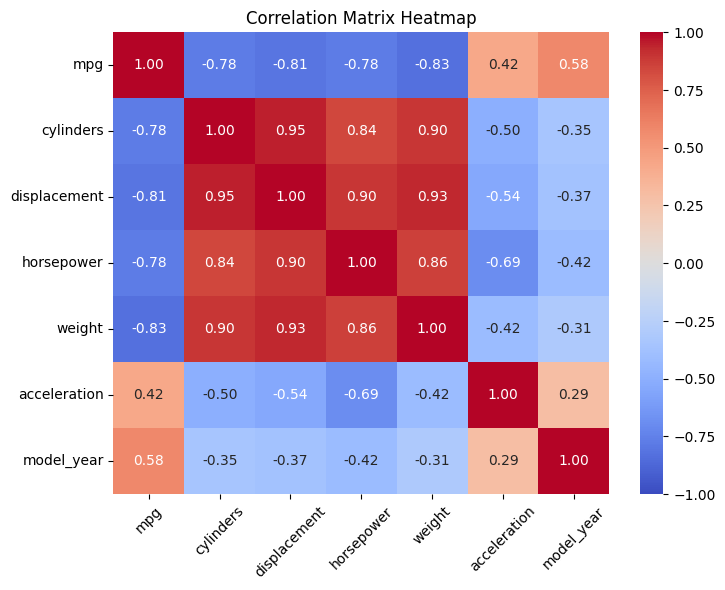

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

### let's see name column

In [19]:
name_count = cars_df.name.value_counts().to_frame()
name_count

,count
name,
amc matador,5
ford pinto,5
toyota corolla,5
toyota corona,4
amc hornet,4
...,...
buick skyhawk,1
chevrolet monza 2+2,1
ford mustang ii,1


In [20]:
print('The top 10 most frequent car names in the dataset:')
top10_car_in_data = name_count.head(10)
top10_car_in_data.style.background_gradient(cmap='Blues')

The top 10 most frequent car names in the dataset:


,count
name,
amc matador,5
ford pinto,5
toyota corolla,5
toyota corona,4
amc hornet,4
chevrolet chevette,4
chevrolet impala,4
amc gremlin,4
peugeot 504,4


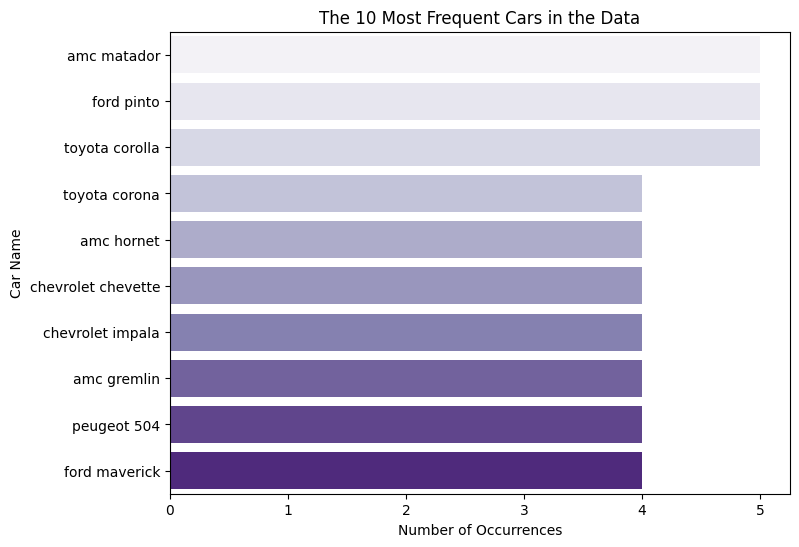

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top10_car_in_data, x='count', y=top10_car_in_data.index, palette='Purples')
plt.title('The 10 Most Frequent Cars in the Data')
plt.xlabel('Number of Occurrences')
plt.ylabel('Car Name')
plt.show()


In [22]:
cars_df.groupby('name').mean(numeric_only=True).head().reset_index()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,amc ambassador brougham,13.00,8.0,360.0,175.0,3821.0,11.00,73.0
1,amc ambassador dpl,15.00,8.0,390.0,190.0,3850.0,8.50,70.0
2,amc ambassador sst,17.00,8.0,304.0,150.0,3672.0,11.50,72.0
3,amc concord,21.85,5.0,191.5,90.0,3106.5,18.65,79.0
4,amc concord d/l,18.10,6.0,258.0,120.0,3410.0,15.10,78.0


### let's see mpg column..

In [23]:
cars_df.mpg.value_counts(bins=10).to_frame()

,count
"(12.76, 16.52]",78
"(16.52, 20.28]",73
"(20.28, 24.04]",58
"(24.04, 27.8]",53
"(27.8, 31.56]",48
"(31.56, 35.32]",37
"(35.32, 39.08]",22
"(8.961, 12.76]",13
"(42.84, 46.6]",6
"(39.08, 42.84]",4


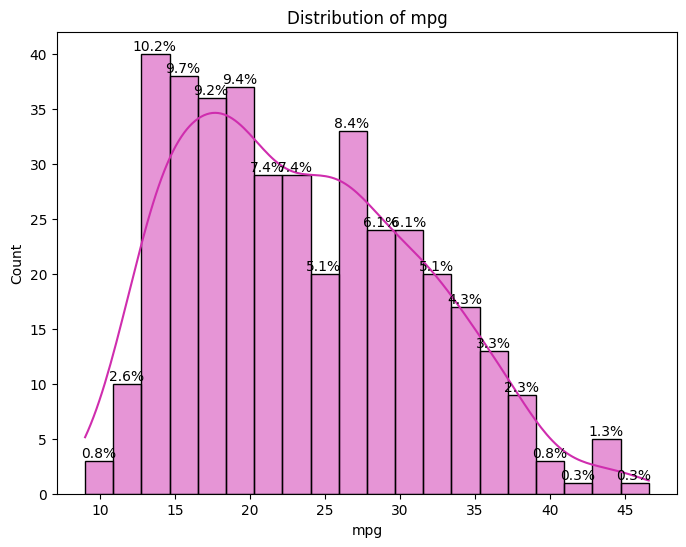

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=cars_df, x='mpg', kde=True, bins=20, color='#cf2dae')
plt.title('Distribution of mpg')

total = len(cars_df['mpg'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [25]:
top10_mpg_car= cars_df.nlargest(10, 'mpg')
top10_mpg_car.style.background_gradient(cmap='PuRd').set_caption('top 10 mpg')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.600000,4,86.000000,65.000000,2110,17.900000,80,japan
329,honda civic 1500 gl,44.600000,4,91.000000,67.000000,1850,13.800000,80,japan
325,vw rabbit c (diesel),44.300000,4,90.000000,48.000000,2085,21.700000,80,europe
394,vw pickup,44.000000,4,97.000000,52.000000,2130,24.600000,82,europe
326,vw dasher (diesel),43.400000,4,90.000000,48.000000,2335,23.700000,80,europe
244,volkswagen rabbit custom diesel,43.100000,4,90.000000,48.000000,1985,21.500000,78,europe
309,vw rabbit,41.500000,4,98.000000,76.000000,2144,14.700000,80,europe
324,datsun 210,40.800000,4,85.000000,65.000000,2110,19.200000,80,japan
247,datsun b210 gx,39.400000,4,85.000000,70.000000,2070,18.600000,78,japan
343,toyota starlet,39.100000,4,79.000000,58.000000,1755,16.900000,81,japan


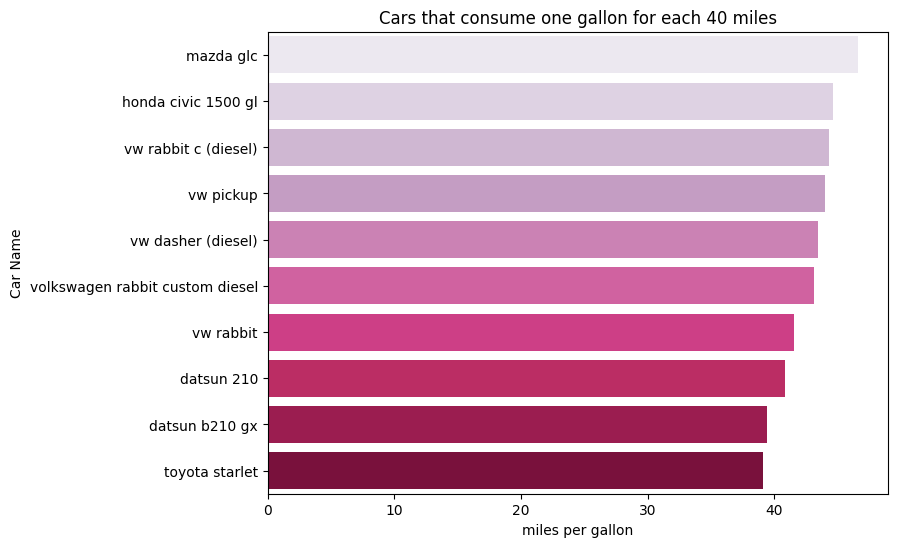

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top10_mpg_car, x='mpg', y='name', palette='PuRd')
plt.title('Cars that consume one gallon for each 40 miles')
plt.xlabel('miles per gallon')
plt.ylabel('Car Name')
plt.show()

In [27]:
car_least_consumes_gallons = top10_mpg_car.loc[top10_mpg_car.mpg.idxmax()]
print(f'The car that consumes the least amount of gallons is "{car_least_consumes_gallons[0]}", which has a rate of one gallon per "{car_least_consumes_gallons[1]}" miles.')

The car that consumes the least amount of gallons is "mazda glc", which has a rate of one gallon per "46.6" miles.


### let's see cylinders column

In [28]:
cars_df.cylinders.value_counts().to_frame()

,count
cylinders,
4,199
8,103
6,83
3,4
5,3


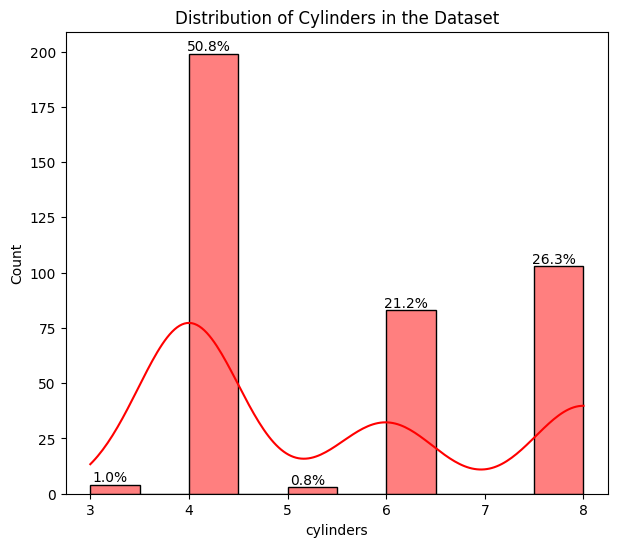

In [29]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=cars_df, x='cylinders', bins=10, kde=2, color='red')
plt.title('Distribution of Cylinders in the Dataset')

total = len(cars_df['cylinders'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [30]:
mean_cylinders = cars_df['cylinders'].mean()
print(f"The average number of cylinders in the cars is {mean_cylinders:.2f}")

The average number of cylinders in the cars is 5.47


In [31]:
cars_that_have_3_cylinders = cars_df[cars_df.cylinders == 3]
cars_that_have_4_cylinders = cars_df[cars_df.cylinders == 4]
cars_that_have_5_cylinders = cars_df[cars_df.cylinders == 5]
cars_that_have_6_cylinders = cars_df[cars_df.cylinders == 6]
cars_that_have_8_cylinders = cars_df[cars_df.cylinders == 8]

In [32]:
cars_that_have_3_cylinders.style.set_caption('Cars that have 3 cylinders in the engine')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
71,mazda rx2 coupe,19.000000,3,70.000000,97.000000,2330,13.500000,72,japan
111,maxda rx3,18.000000,3,70.000000,90.000000,2124,13.500000,73,japan
243,mazda rx-4,21.500000,3,80.000000,110.000000,2720,13.500000,77,japan
334,mazda rx-7 gs,23.700000,3,70.000000,100.000000,2420,12.500000,80,japan


In [33]:
cars_that_have_4_cylinders.head().style.set_caption('Cars that have 4 cylinders in the engine')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.000000,4,113.000000,95.000000,2372,15.000000,70,japan
18,datsun pl510,27.000000,4,97.000000,88.000000,2130,14.500000,70,japan
19,volkswagen 1131 deluxe sedan,26.000000,4,97.000000,46.000000,1835,20.500000,70,europe
20,peugeot 504,25.000000,4,110.000000,87.000000,2672,17.500000,70,europe
21,audi 100 ls,24.000000,4,107.000000,90.000000,2430,14.500000,70,europe


In [34]:
cars_that_have_5_cylinders.style.set_caption('Cars that have 5 cylinders in the engine')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,audi 5000,20.300000,5,131.000000,103.000000,2830,15.900000,78,europe
297,mercedes benz 300d,25.400000,5,183.000000,77.000000,3530,20.100000,79,europe
327,audi 5000s (diesel),36.400000,5,121.000000,67.000000,2950,19.900000,80,europe


In [35]:
cars_that_have_6_cylinders.head().style.set_caption('Cars that have 6 cylinders in the engine')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
15,plymouth duster,22.000000,6,198.000000,95.000000,2833,15.500000,70,usa
16,amc hornet,18.000000,6,199.000000,97.000000,2774,15.500000,70,usa
17,ford maverick,21.000000,6,200.000000,85.000000,2587,16.000000,70,usa
24,amc gremlin,21.000000,6,199.000000,90.000000,2648,15.000000,70,usa
33,amc gremlin,19.000000,6,232.000000,100.000000,2634,13.000000,71,usa


In [36]:
cars_that_have_8_cylinders.head().style.set_caption('Cars that have 8 cylinders in the engine')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.000000,8,307.000000,130.000000,3504,12.000000,70,usa
1,buick skylark 320,15.000000,8,350.000000,165.000000,3693,11.500000,70,usa
2,plymouth satellite,18.000000,8,318.000000,150.000000,3436,11.000000,70,usa
3,amc rebel sst,16.000000,8,304.000000,150.000000,3433,12.000000,70,usa
4,ford torino,17.000000,8,302.000000,140.000000,3449,10.500000,70,usa


### let's see displacement column

In [37]:
cars_df.displacement.value_counts(bins=10).to_frame()

,count
"(67.612, 106.7]",104
"(106.7, 145.4]",88
"(222.8, 261.5]",57
"(300.2, 338.9]",42
"(338.9, 377.6]",31
"(145.4, 184.1]",30
"(377.6, 416.3]",16
"(184.1, 222.8]",12
"(416.3, 455.0]",9
"(261.5, 300.2]",3


In [38]:
max_displacement = cars_df[cars_df['displacement'] == cars_df['displacement'].max()]
max_displacement.head(1).style.set_caption('Car with the most displacement')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
8,pontiac catalina,14.000000,8,455.000000,225.000000,4425,10.000000,70,usa


In [39]:
min_displacement = cars_df[cars_df['displacement'] == cars_df['displacement'].min()]
min_displacement.head(1).style.set_caption('Car with the least displacement')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
117,fiat 128,29.000000,4,68.000000,49.000000,1867,19.500000,73,europe


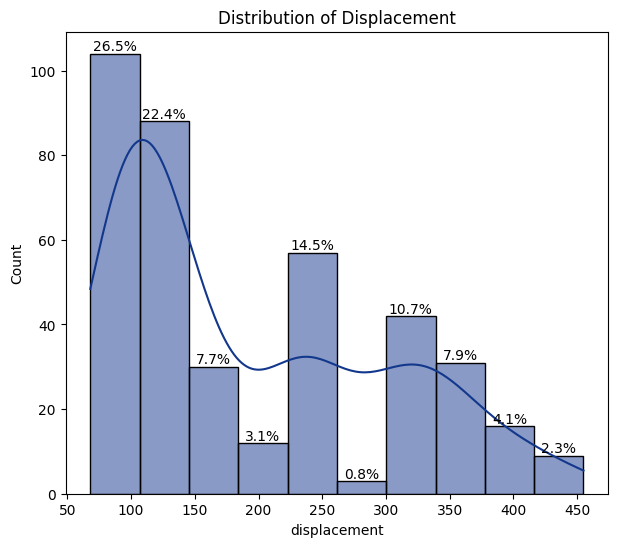

In [40]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=cars_df, x='displacement', bins=10, kde=2, color='#12378c')
plt.title('Distribution of Displacement')

total = len(cars_df['displacement'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [41]:
print(f"The mean displacement of the cars is {cars_df['displacement'].mean():.2f}")

The mean displacement of the cars is 194.41


In [42]:
top10_car_displacement = cars_df.nlargest(10, 'displacement')
top10_car_displacement.style.set_caption('The top ten cars by displacement').background_gradient('Blues')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
8,pontiac catalina,14.000000,8,455.000000,225.000000,4425,10.000000,70,usa
13,buick estate wagon (sw),14.000000,8,455.000000,225.000000,3086,10.000000,70,usa
95,buick electra 225 custom,12.000000,8,455.000000,225.000000,4951,11.000000,73,usa
6,chevrolet impala,14.000000,8,454.000000,220.000000,4354,9.000000,70,usa
7,plymouth fury iii,14.000000,8,440.000000,215.000000,4312,8.500000,70,usa
94,chrysler new yorker brougham,13.000000,8,440.000000,215.000000,4735,11.000000,73,usa
5,ford galaxie 500,15.000000,8,429.000000,198.000000,4341,10.000000,70,usa
67,mercury marquis,11.000000,8,429.000000,208.000000,4633,11.000000,72,usa
90,mercury marquis brougham,12.000000,8,429.000000,198.000000,4952,11.500000,73,usa
12,chevrolet monte carlo,15.000000,8,400.000000,150.000000,3761,9.500000,70,usa


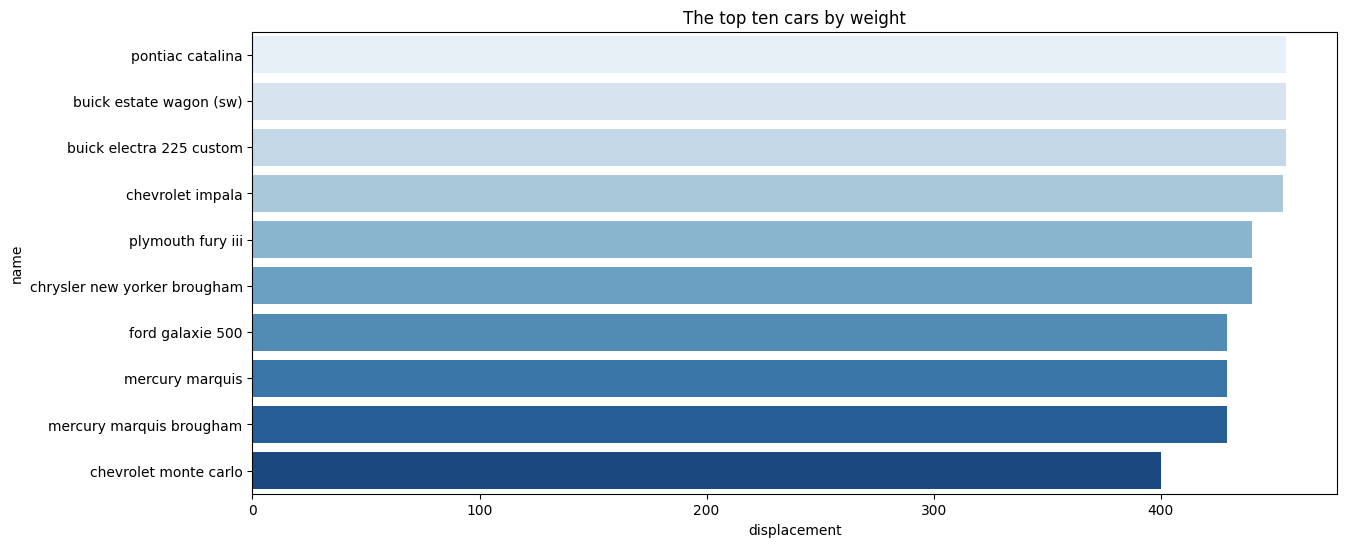

In [43]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='displacement', y='name', data=top10_car_displacement, palette="Blues")
plt.title('The top ten cars by weight')
plt.xticks(rotation=0)
plt.show()

### horsepower

In [44]:
cars_df['horsepower'].value_counts(bins=10).to_frame()

,count
"(82.8, 101.2]",120
"(64.4, 82.8]",95
"(138.0, 156.4]",46
"(101.2, 119.6]",44
"(45.815000000000005, 64.4]",27
"(119.6, 138.0]",20
"(174.8, 193.2]",14
"(156.4, 174.8]",13
"(211.6, 230.0]",8
"(193.2, 211.6]",5


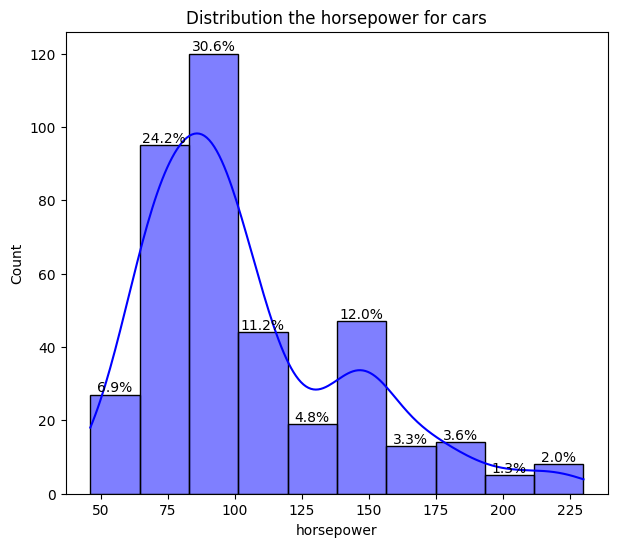

In [45]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=cars_df, x='horsepower', bins=10, kde=2, color='blue')
plt.title('Distribution the horsepower for cars')

total = len(cars_df['horsepower'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [46]:
print(f"The mean horsepower of the cars is {cars_df['horsepower'].mean():.2f}")

The mean horsepower of the cars is 104.47


In [47]:
top10_car_hoursepower = cars_df.nlargest(10, 'horsepower')
top10_car_hoursepower.style.set_caption('The top ten cars by horsepower').background_gradient('Purples')


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
116,pontiac grand prix,16.000000,8,400.000000,230.000000,4278,9.500000,73,usa
8,pontiac catalina,14.000000,8,455.000000,225.000000,4425,10.000000,70,usa
13,buick estate wagon (sw),14.000000,8,455.000000,225.000000,3086,10.000000,70,usa
95,buick electra 225 custom,12.000000,8,455.000000,225.000000,4951,11.000000,73,usa
6,chevrolet impala,14.000000,8,454.000000,220.000000,4354,9.000000,70,usa
7,plymouth fury iii,14.000000,8,440.000000,215.000000,4312,8.500000,70,usa
25,ford f250,10.000000,8,360.000000,215.000000,4615,14.000000,70,usa
94,chrysler new yorker brougham,13.000000,8,440.000000,215.000000,4735,11.000000,73,usa
27,dodge d200,11.000000,8,318.000000,210.000000,4382,13.500000,70,usa
67,mercury marquis,11.000000,8,429.000000,208.000000,4633,11.000000,72,usa


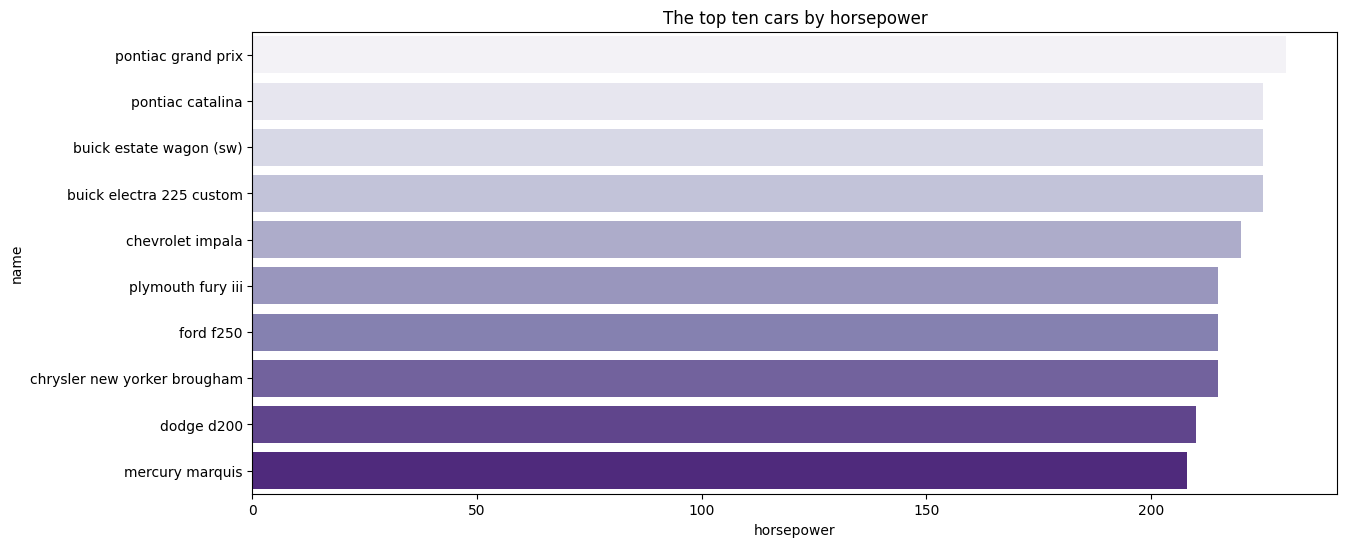

In [48]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='horsepower', y='name', data=top10_car_hoursepower, palette="Purples")
plt.title('The top ten cars by horsepower')
plt.xticks(rotation=0)
plt.show()


In [49]:
max_horsepower = cars_df[cars_df['horsepower'] == cars_df['horsepower'].max()]
max_horsepower.head(1).style.set_caption('Car with the most horsepower')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
116,pontiac grand prix,16.000000,8,400.000000,230.000000,4278,9.500000,73,usa


In [50]:
min_horsepower = cars_df[cars_df['horsepower'] == cars_df['horsepower'].min()]
min_horsepower.head(1).style.set_caption('Car with the least horsepower')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.000000,4,97.000000,46.000000,1835,20.500000,70,europe


### weight

In [51]:
cars_df['weight'].value_counts(bins=10).to_frame()

,count
"(1965.7, 2318.4]",89
"(2318.4, 2671.1]",58
"(2671.1, 3023.8]",52
"(3376.5, 3729.2]",40
"(3023.8, 3376.5]",36
"(4081.9, 4434.6]",34
"(1609.472, 1965.7]",30
"(3729.2, 4081.9]",29
"(4434.6, 4787.3]",18
"(4787.3, 5140.0]",6


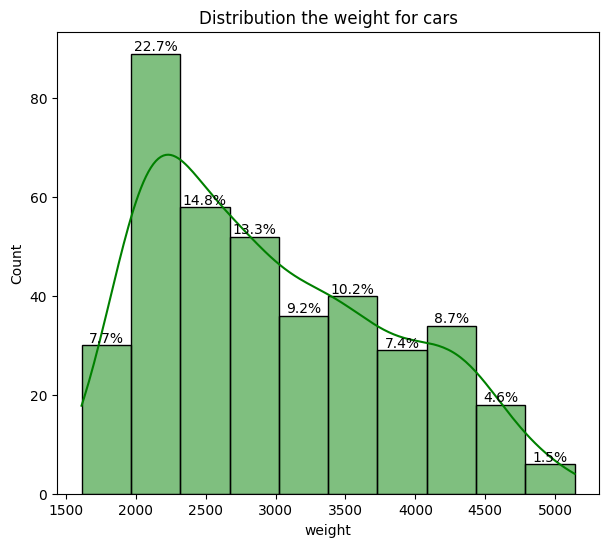

In [52]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=cars_df, x='weight', bins=10, kde=2, color='green')
plt.title('Distribution the weight for cars')

total = len(cars_df['weight'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [53]:
print(f"The mean weight of the cars is {cars_df['weight'].mean():.2f}")

The mean weight of the cars is 2977.58


In [54]:
top10_car_weight = cars_df.nlargest(10, 'weight')
top10_car_weight.style.set_caption('The top ten cars by weight').background_gradient('Greens')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
44,pontiac safari (sw),13.000000,8,400.000000,175.000000,5140,12.000000,71,usa
103,chevrolet impala,11.000000,8,400.000000,150.000000,4997,14.000000,73,usa
42,dodge monaco (sw),12.000000,8,383.000000,180.000000,4955,11.500000,71,usa
90,mercury marquis brougham,12.000000,8,429.000000,198.000000,4952,11.500000,73,usa
95,buick electra 225 custom,12.000000,8,455.000000,225.000000,4951,11.000000,73,usa
104,ford country,12.000000,8,400.000000,167.000000,4906,12.500000,73,usa
43,ford country squire (sw),13.000000,8,400.000000,170.000000,4746,12.000000,71,usa
94,chrysler new yorker brougham,13.000000,8,440.000000,215.000000,4735,11.000000,73,usa
28,hi 1200d,9.000000,8,304.000000,193.000000,4732,18.500000,70,usa
137,buick century luxus (sw),13.000000,8,350.000000,150.000000,4699,14.500000,74,usa


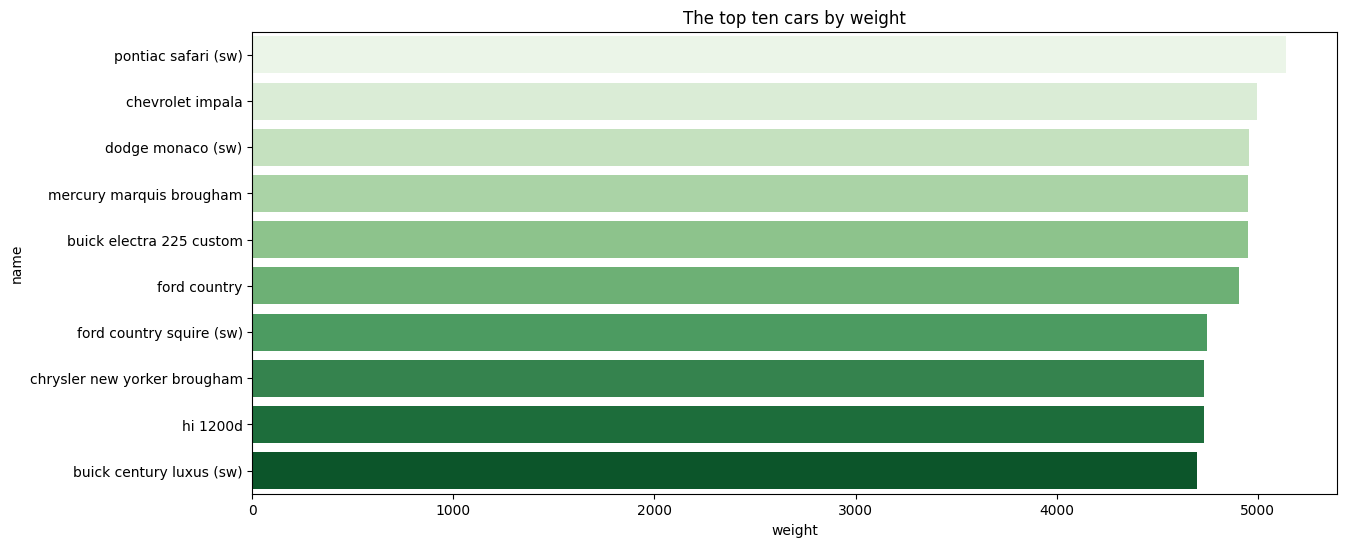

In [55]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='weight', y='name', data=top10_car_weight, palette="Greens")
plt.title('The top ten cars by weight')
plt.xticks(rotation=0)
plt.show()

In [56]:
max_weight = cars_df[cars_df['weight'] == cars_df['weight'].max()]
max_weight.head(1).style.set_caption('Car with the most weight')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
44,pontiac safari (sw),13.000000,8,400.000000,175.000000,5140,12.000000,71,usa


In [57]:
min_weight = cars_df[cars_df['weight'] == cars_df['weight'].min()]
min_weight.head(1).style.set_caption('Car with the least weight')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
54,datsun 1200,35.000000,4,72.000000,69.000000,1613,18.000000,71,japan


### acceleration

In [58]:
cars_df.acceleration.value_counts(bins=10).to_frame()

,count
"(14.72, 16.4]",100
"(13.04, 14.72]",85
"(16.4, 18.08]",69
"(11.36, 13.04]",50
"(18.08, 19.76]",44
"(9.68, 11.36]",15
"(19.76, 21.44]",12
"(21.44, 23.12]",7
"(7.981999999999999, 9.68]",6
"(23.12, 24.8]",4


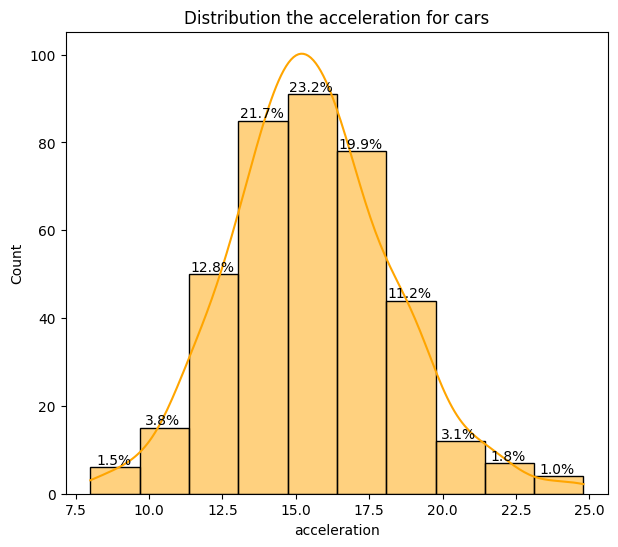

In [59]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=cars_df, x='acceleration', bins=10, kde=2, color='orange')
plt.title('Distribution the acceleration for cars')

total = len(cars_df['acceleration'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [60]:
print(f"The mean acceleration of the cars is {cars_df['acceleration'].mean():.2f}")

The mean acceleration of the cars is 15.54


In [61]:
top10_car_acceleration = cars_df.nlargest(10, 'acceleration')
top10_car_acceleration.style.set_caption('The top ten cars by acceleration').background_gradient('Oranges')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
299,peugeot 504,27.200000,4,141.000000,71.000000,3190,24.800000,79,europe
394,vw pickup,44.000000,4,97.000000,52.000000,2130,24.600000,82,europe
326,vw dasher (diesel),43.400000,4,90.000000,48.000000,2335,23.700000,80,europe
59,volkswagen type 3,23.000000,4,97.000000,54.000000,2254,23.500000,72,europe
195,chevrolet chevette,29.000000,4,85.000000,52.000000,2035,22.200000,76,usa
300,oldsmobile cutlass salon brougham,23.900000,8,260.000000,90.000000,3420,22.200000,79,usa
196,chevrolet woody,24.500000,4,98.000000,60.000000,2164,22.100000,76,usa
209,peugeot 504,19.000000,4,120.000000,88.000000,3270,21.900000,76,europe
328,mercedes-benz 240d,30.000000,4,146.000000,67.000000,3250,21.800000,80,europe
325,vw rabbit c (diesel),44.300000,4,90.000000,48.000000,2085,21.700000,80,europe


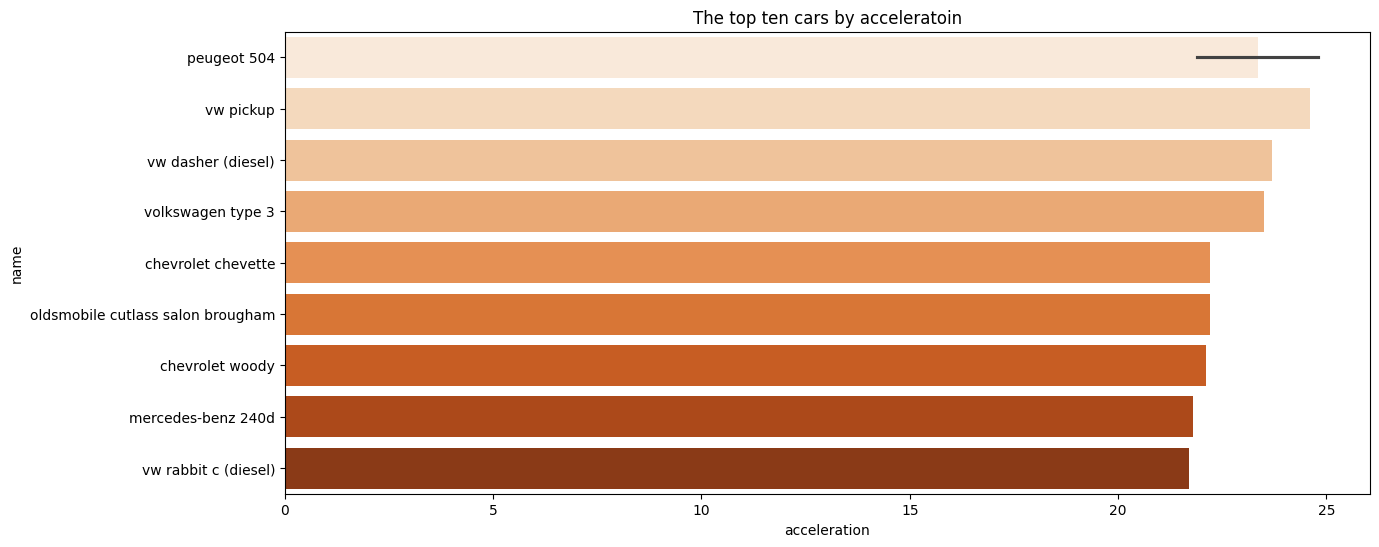

In [62]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='acceleration', y='name', data=top10_car_acceleration, palette="Oranges")
plt.title('The top ten cars by acceleratoin')
plt.xticks(rotation=0)
plt.show()

In [63]:
max_acceleration = cars_df[cars_df['acceleration'] == cars_df['acceleration'].max()]
max_acceleration.head(1).style.set_caption('Car with the most acceleration')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
299,peugeot 504,27.200000,4,141.000000,71.000000,3190,24.800000,79,europe


In [64]:
min_acceleration = cars_df[cars_df['acceleration'] == cars_df['acceleration'].min()]
min_acceleration.head(1).style.set_caption('Car with the least acceleration')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
11,plymouth 'cuda 340,14.000000,8,340.000000,160.000000,3609,8.000000,70,usa


### model year

In [65]:
model_year = cars_df.model_year.value_counts().to_frame()
model_year

,count
model_year,
73,40
78,36
76,34
75,30
82,30
70,29
79,29
72,28
77,28


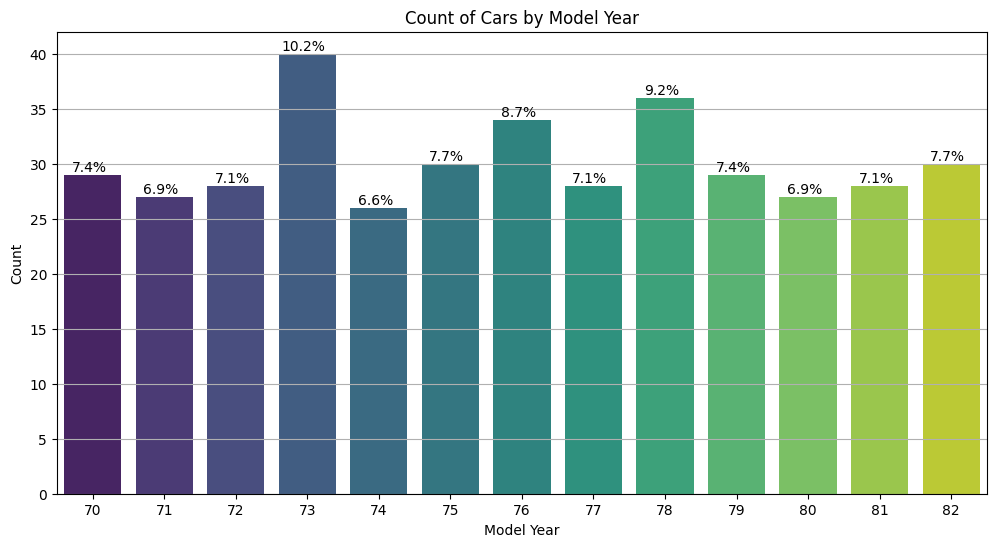

In [66]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=cars_df, x='model_year', palette='viridis')
plt.title('Count of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(axis='y')

total = len(cars_df['model_year'])
for p in ax.patches:
    if p.get_height() > 0:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [67]:
model_year_mean = cars_df['model_year'].mean()
print(f"Mean Model Year: {model_year_mean}")

Mean Model Year: 75.9795918367347


In [68]:
latest_car_models = cars_df[cars_df['model_year'] == cars_df['model_year'].min()]
latest_car_models.head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


In [69]:
oldest_car_models = cars_df[cars_df['model_year'] == cars_df['model_year'].max()]
oldest_car_models.head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
367,chevrolet cavalier,28.0,4,112.0,88.0,2605,19.6,82,usa
368,chevrolet cavalier wagon,27.0,4,112.0,88.0,2640,18.6,82,usa
369,chevrolet cavalier 2-door,34.0,4,112.0,88.0,2395,18.0,82,usa
370,pontiac j2000 se hatchback,31.0,4,112.0,85.0,2575,16.2,82,usa
371,dodge aries se,29.0,4,135.0,84.0,2525,16.0,82,usa
372,pontiac phoenix,27.0,4,151.0,90.0,2735,18.0,82,usa
373,ford fairmont futura,24.0,4,140.0,92.0,2865,16.4,82,usa
375,volkswagen rabbit l,36.0,4,105.0,74.0,1980,15.3,82,europe
376,mazda glc custom l,37.0,4,91.0,68.0,2025,18.2,82,japan
377,mazda glc custom,31.0,4,91.0,68.0,1970,17.6,82,japan


### origin

In [70]:
cars_count = cars_df.origin.value_counts()
cars_count

,count
origin,
usa,245
japan,79
europe,68


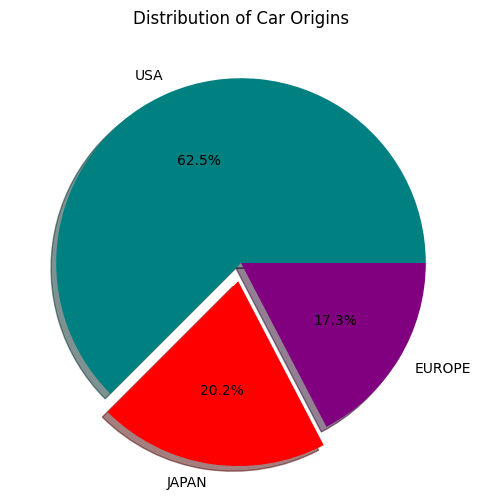

In [71]:
plt.figure(figsize=(8, 6))
plt.pie(x=cars_count, labels=cars_count.index.str.upper(), autopct='%1.1f%%', shadow=True, explode=[0, 0.1, 0], colors=["teal", 'red', 'purple'])
plt.title('Distribution of Car Origins')
plt.show()

### Uni-variate

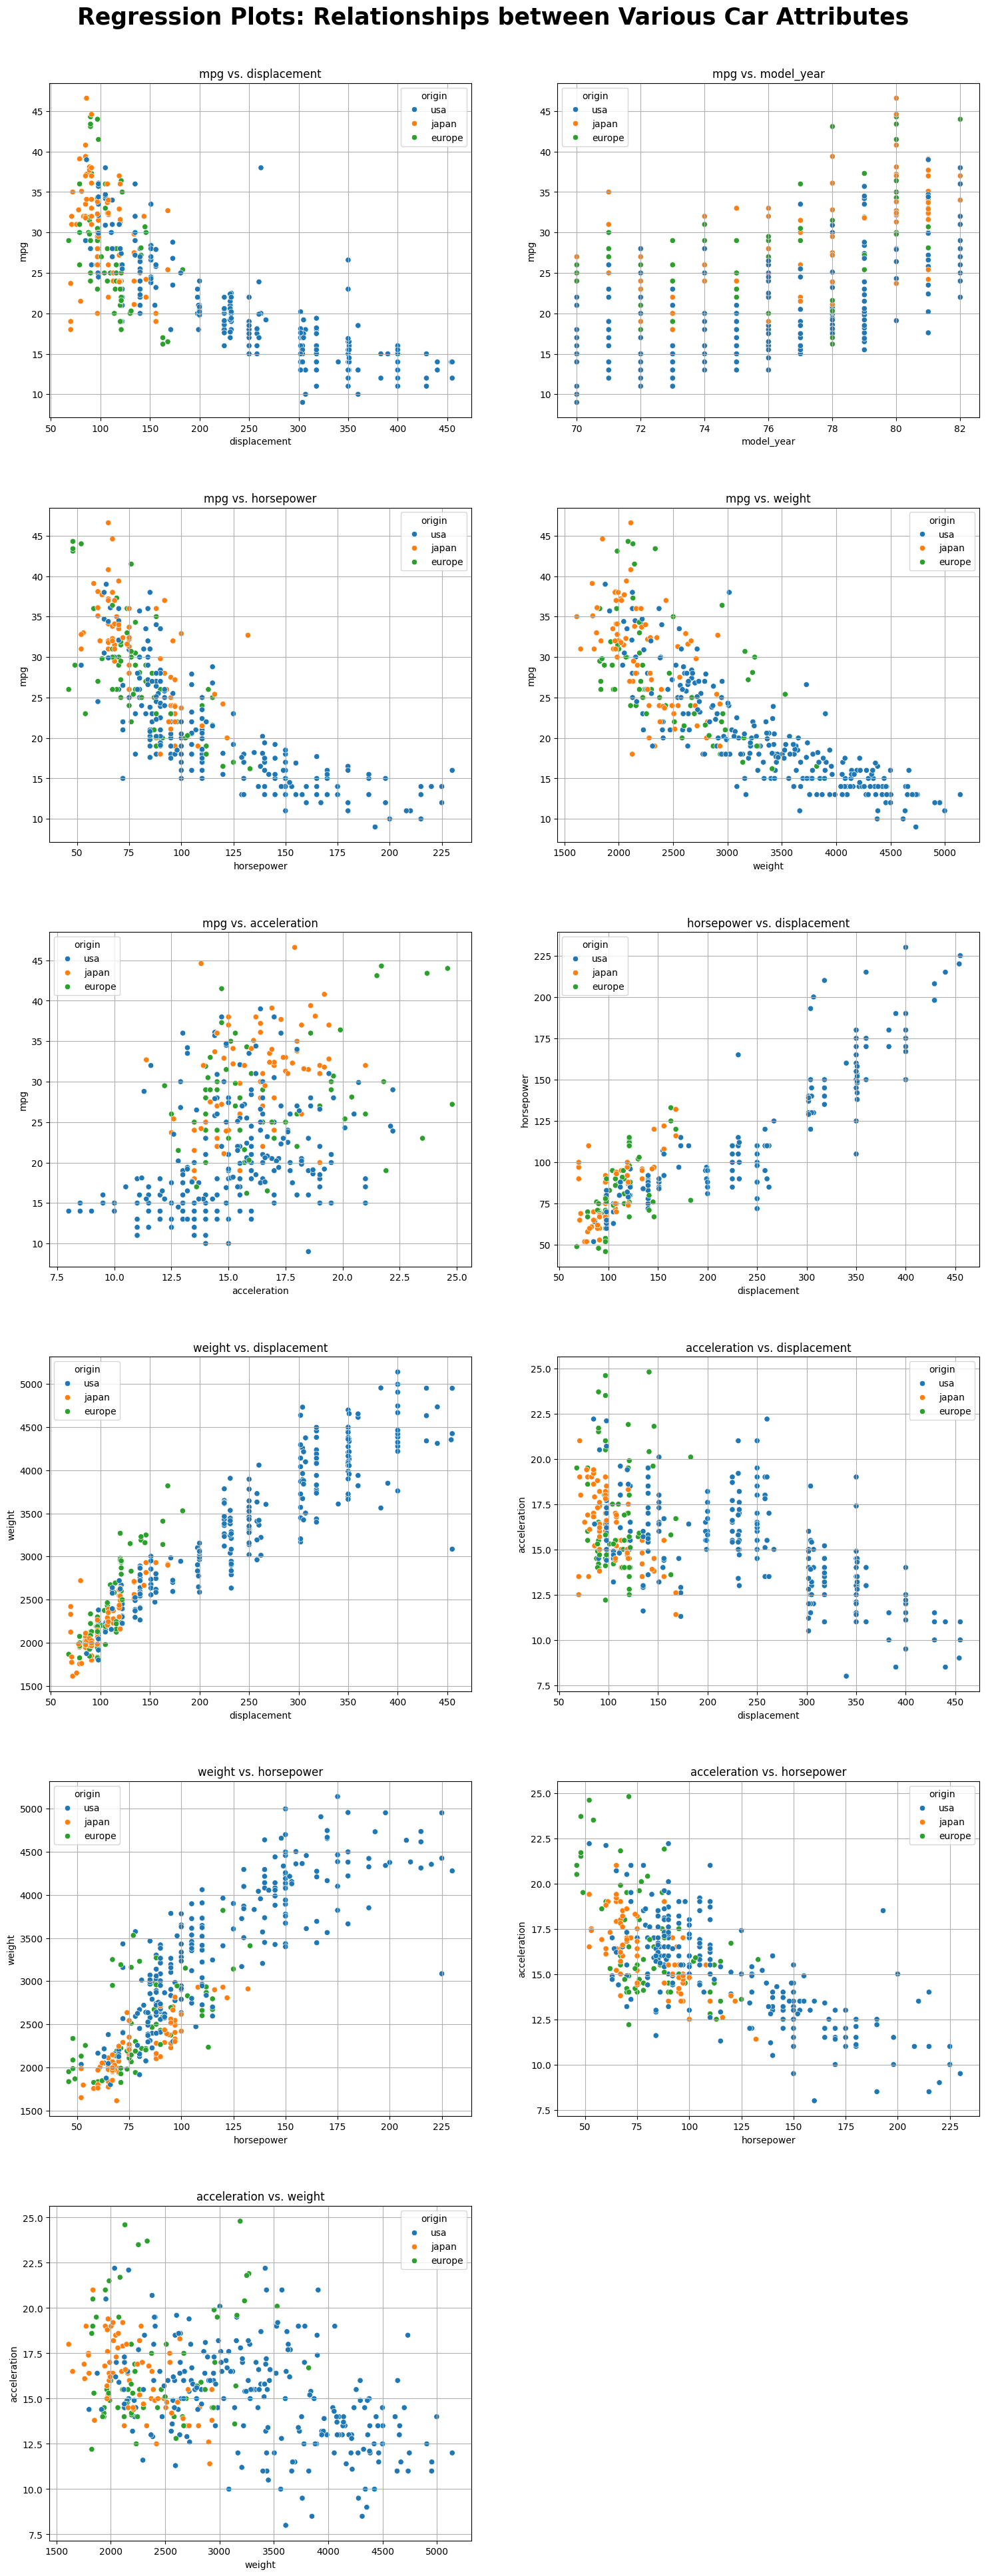

In [72]:
lm_pairs = [
    ('displacement', 'mpg'),
    ('model_year', 'mpg'),
    ('horsepower', 'mpg'),
    ('weight', 'mpg'),
    ('acceleration', 'mpg'),
    ('displacement', 'horsepower'),
    ('displacement', 'weight'),
    ('displacement', 'acceleration'),
    ('horsepower', 'weight'),
    ('horsepower', 'acceleration'),
    ('weight', 'acceleration')
]

plt.figure(figsize=(16, 40))
plt.suptitle('Regression Plots: Relationships between Various Car Attributes', fontsize=25, fontweight='bold', y=0.98)

for i, (x, y) in enumerate(lm_pairs, 1):
    plt.subplot(6, 2, i)
    sns.scatterplot(data=cars_df, x=x, y=y, hue='origin')
    plt.title(f'{y} vs. {x}')
    plt.grid()

plt.tight_layout(pad=5)
plt.show()


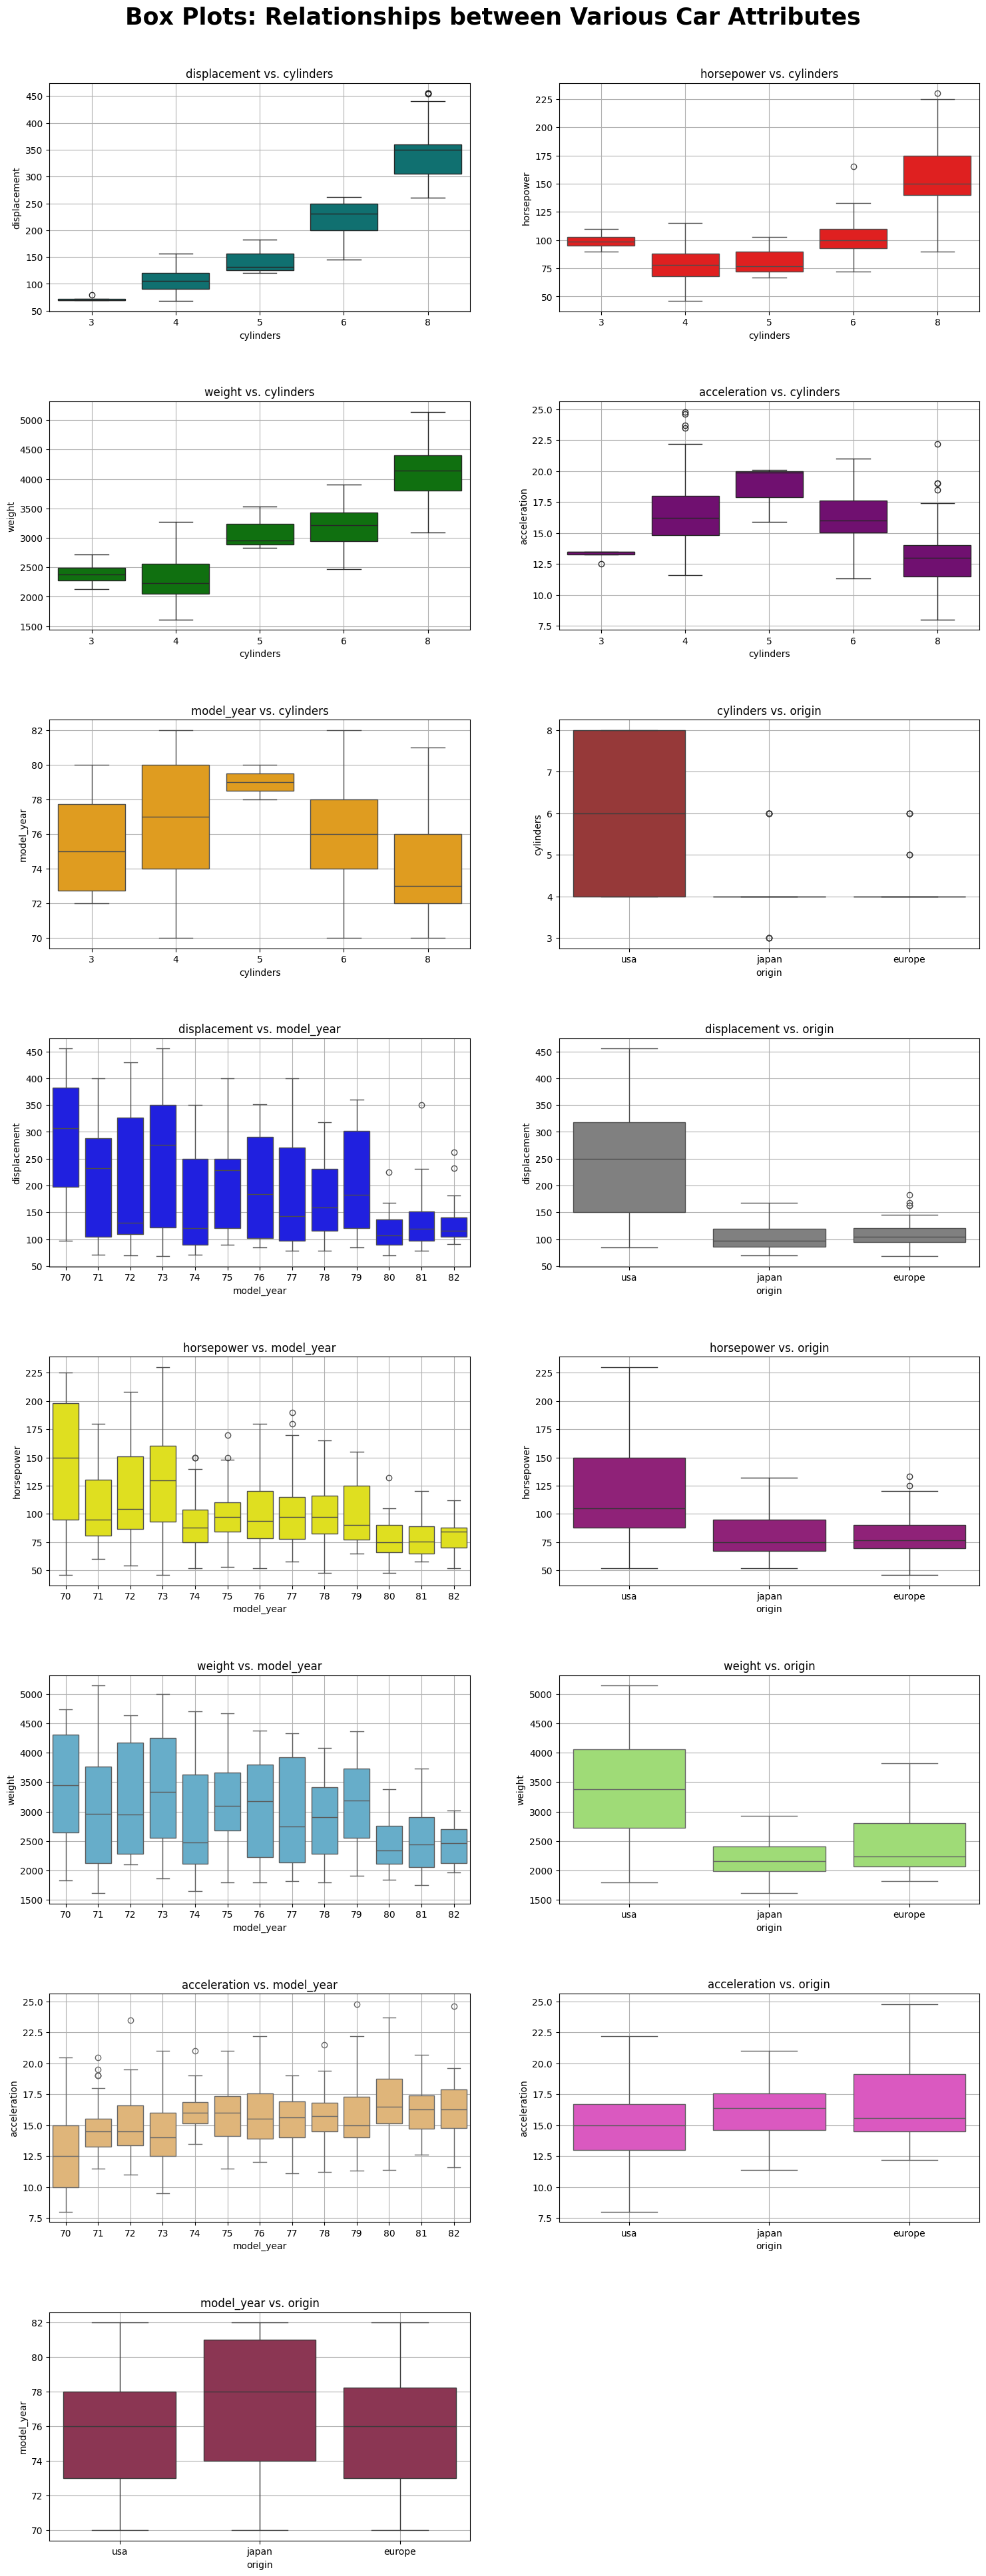

In [73]:
box_pairs = [
    ('cylinders', 'displacement', 'teal'),
    ('cylinders', 'horsepower', 'red'),
    ('cylinders', 'weight', 'green'),
    ('cylinders', 'acceleration', 'purple'),
    ('cylinders', 'model_year', 'orange'),
    ('origin', 'cylinders', 'brown'),
    ('model_year', 'displacement', 'blue'),
    ('origin', 'displacement', 'gray'),
    ('model_year', 'horsepower', 'yellow'),
    ('origin', 'horsepower', '#a11083'),
    ('model_year', 'weight', '#57b4d9'),
    ('origin', 'weight', '#9ceb67'),
    ('model_year', 'acceleration', '#f0b869'),
    ('origin', 'acceleration', '#f043cd'),
    ('origin', 'model_year', '#99284f')
]

plt.figure(figsize=(16, 40))
plt.suptitle('Box Plots: Relationships between Various Car Attributes', fontsize=25, fontweight='bold', y=0.98)

for i, (x, y, color) in enumerate(box_pairs, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(data=cars_df, x=x, y=y, color=color)
    plt.title(f'{y} vs. {x}')
    plt.grid()

plt.tight_layout(pad=5)
plt.show()

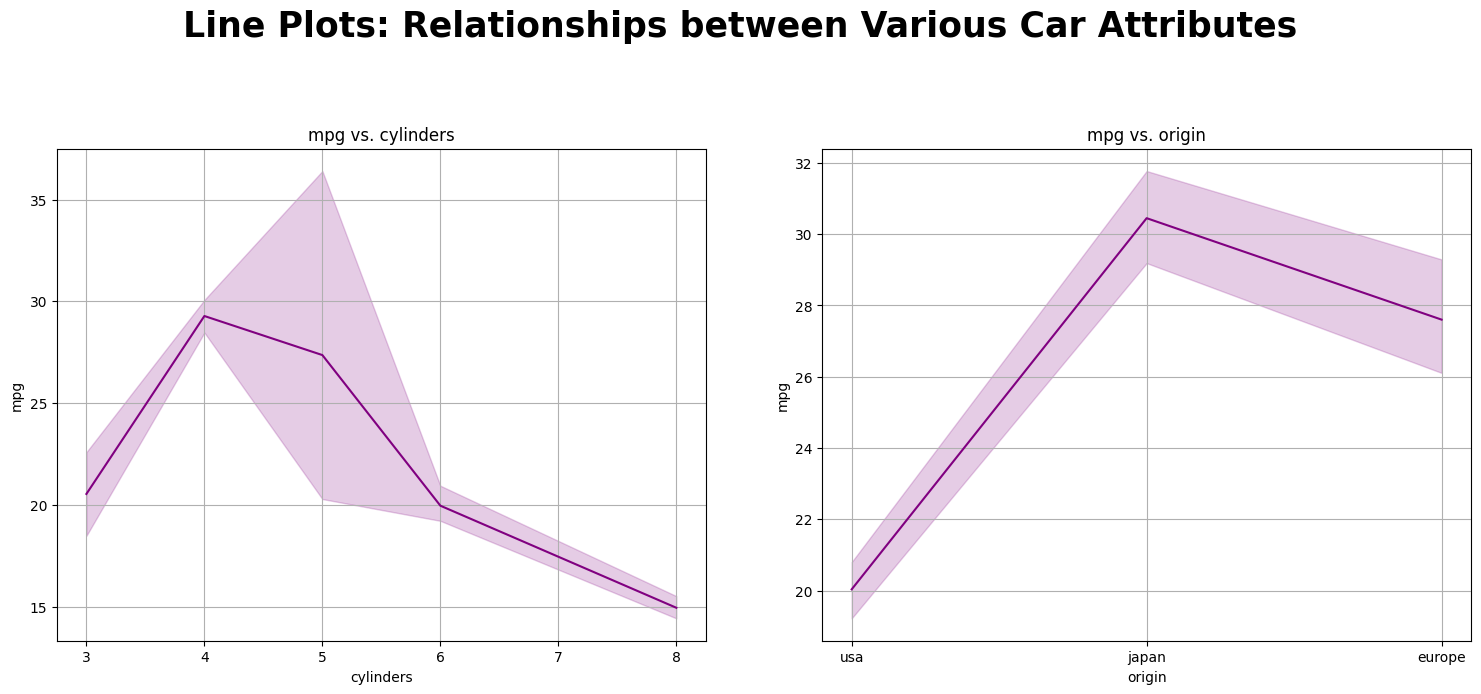

In [74]:
line_pairs = [
    ('cylinders', 'mpg'),
    ('origin', 'mpg')
]

plt.figure(figsize=(16, 8))
plt.suptitle('Line Plots: Relationships between Various Car Attributes', fontsize=25, fontweight='bold', y=0.93)

for i, (x, y) in enumerate(line_pairs, 1):
    plt.subplot(1, 2, i)
    sns.lineplot(data=cars_df, x=x, y=y, color='purple')
    plt.title(f'{y} vs. {x}')
    plt.grid()

plt.tight_layout(pad=5)
plt.show()
